# Сборный проект.

# Описание проекта.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных.
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


Импортирую библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

## **Шаг1.** Ознакомление с данными

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#При выводе первых 5-ти строк таблицы, уже видны пропуски. Посмотрю всю информацию по датафрейму
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


пропусков много, отработаем их дальше

## **Шаг 2. Подготовка данных.**

###  Заменю названия столбцов (приведу к нижнему регистру).

In [4]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразую данные в нужные типы.

In [5]:
#при смене тип данных на float код отобразил ошибку "could not convert string to float: 'tbd' ". тогда давайте посмотрим что за tbd
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

посколько нигде у нас не отображено, что это означает, проверю в скольких строках данное значение, что понимать заменить tbd значением nan или можно удалить

In [6]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [7]:
#строк с данным значением 2424, тогда заменю их на nan 
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['user_score'].head(10)

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
5    NaN
6    8.5
7    6.6
8    8.4
9    NaN
Name: user_score, dtype: float64

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


от tbd избавилась и поменяла тип на float

In [9]:
#Также проверю на наличие явных дубликатов
games.duplicated().sum()

0

In [10]:
#Явных дубликатов нет. Перейду к неявным дубликатам.
games[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [11]:
#удалю совпадение и приступлю к обработке пропусков
games.loc[:, 'name':'year_of_release'].drop_duplicates()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработаю пропуски, если они имеются.**

In [12]:
#проверю в каких стоблцах имеются пропуски
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

в столбце name 2 пропуска, их можно удалить, тк слишком мало и на общие данные можно сказать не повлияют


In [13]:
games = games.dropna(subset=['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Далее посмотрим столбецы year_of_release. Год выхода игры не заполнить медианной или средней, как так для каждой игры он определенный. От общего числа значений, пропусков не так много, поэтому я их удалю.

Перейдем к стоблцам critic_score и  user_score, так как они похожи по значению. Заменить средней или медианной также не можем, поскольку вдруг в момент выхода игры не было требования оценки игры. Поэтому оставлю как есть.

И перейдем к последнему столбцу rating. Заполнить данные средней, медианной или иными значения не получится, поэтому оставляем как есть.

### Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


ВЫВОД: там, где это было возможно, пропуски были заменены. Что касается остальных пропусков, для их заполнения у меня недостаточно данных. Поэтому, лучше будем работать с меньшим количеством данных но хорошего качества. В остальном же, ошибки в данных устранены. Данные подготовлены к дальнейшему анализу.

Пропуски могли возникнуть как в следствии человечеаского фактора, например год выхода игры, так и допустим в следствии того, что по некоторым играм пока нет информции (по оценкам допустим), может игроки или критики не передавали данную информацию.

In [15]:
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!

## Шаг 3. Проведение исследовательского анализа данных.

### Посмотрю сколько игр выпускалось в разные годы и насколько важны данные за все периоды.

In [16]:
number_of_games_released = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')
number_of_games_released.columns = ['games_count']
number_of_games_released

,games_count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


Text(0, 0.5, 'Количество продаж')

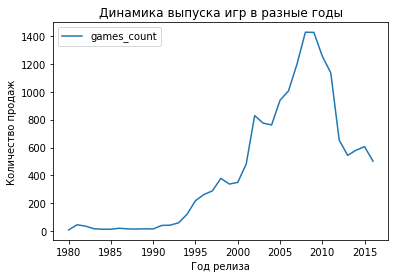

In [17]:
number_of_games_released.plot()
plt.title("Динамика выпуска игр в разные годы")
plt.xlabel("Год релиза")
plt.ylabel("Количество продаж")

Исходя из графика можно сказать, что пик выхода игр приходится на 2008-2009 гг., а вот до 1994 г. было игр мало. Возможно, резкий скачек роста игр был связан с выходом разных игровых приставок, а спад скорей всего связан с тем, что цифровые технологие начали стремительно развиваться и игровые приставки перестали пользоваться таким спросом, как ранее

### Посмотрю, как менялись продажи по платформам. Выберу платформы с наибольшими суммарными продажами и построю распределение по годам. Посмотрю за какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
sales_platform = pd.pivot_table(games, index=['platform'], values='total_sales', aggfunc='sum')
sales_platform = sales_platform.sort_values('total_sales',ascending=False)
sales_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Посмотрим на самые популярные игровые платформы в числовом отображении. Из данных можно сказать, что наиболее популярные игровые платформы за весь период это PS2, PS3, X360,  WII, DS, PS. Построим график для графического отображения.


Text(0, 0.5, 'Количество продаж')

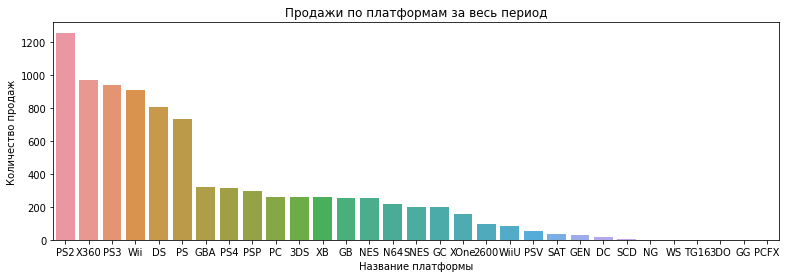

In [19]:
sales_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=sales_platform.index,y=sales_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Возьмем за топ следующие 6 платформ, так как по следующим значительная разница

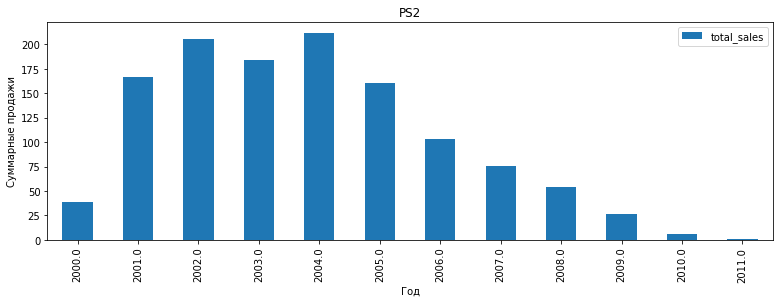

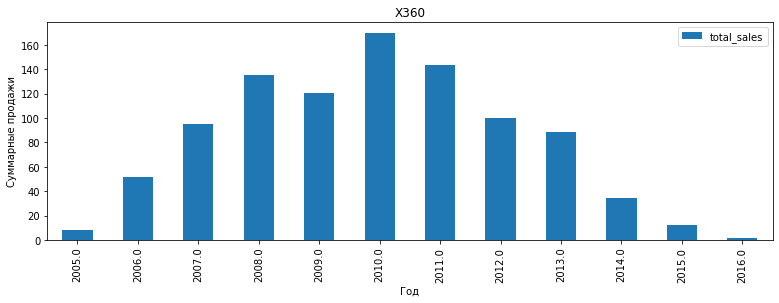

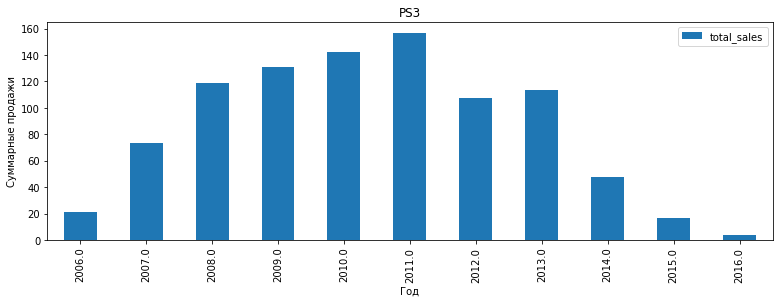

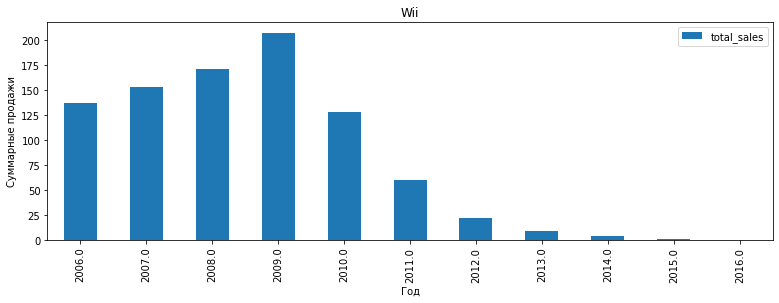

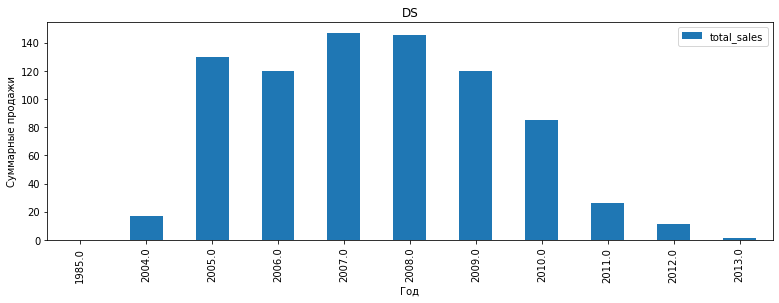

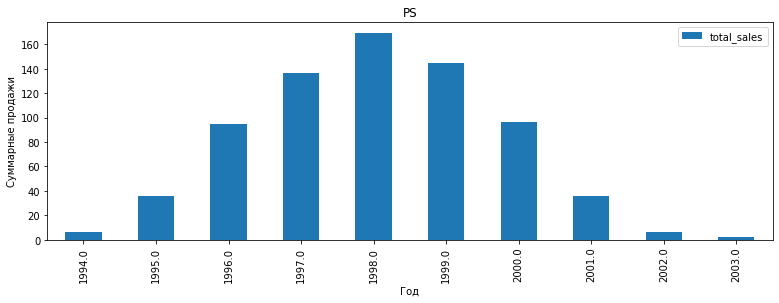

In [20]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in top_platforms:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)
    plt.xlabel("Год")
    plt.ylabel("Суммарные продажи")

А теперь из графиков сделаем вывод продолжительности "жизни" платформ:

PS2 - с 2000 до 2011 гг. - 11 лет; 

Х360  - с 2005 до 2016 гг. - 11 лет; 

PS3 - с 2006 по 2016 гг. - 10 лет;

Wii - с 2006 по 2016 гг. - 10 лет;

DS - вышла в 1985, потом вообще нет данных. Может данные не собирали, либо игру сняли с продажи на какое время, не известно. Далее видим,что с 2004 по 2013 г. были продажи, - 9 лет;

PS - с 1994 года до 2003 гг. - 9 лет;

Таким образом, можно сказать, что в среднем платформа живет 10 лет.

### Проанализурую актуальный период.

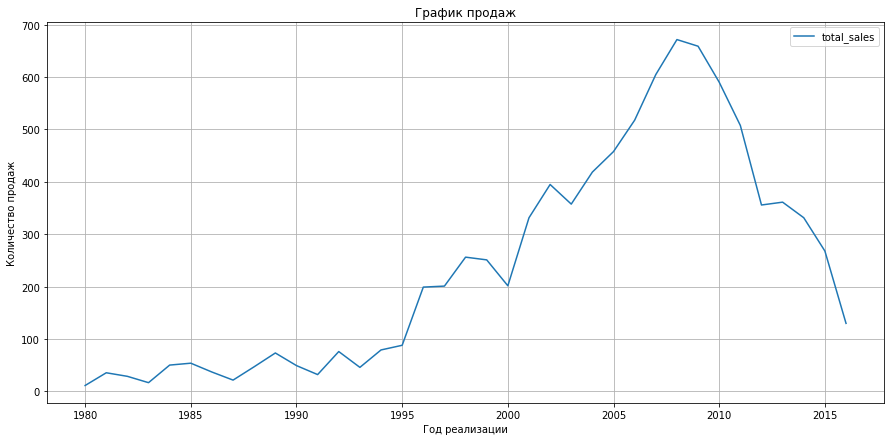

In [21]:
#построю график продаж для определения актуального периода 
games.pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 7))
plt.title('График продаж')
plt.xlabel('Год реализации')
plt.ylabel('Количество продаж')
plt.show()

из графика можно сказать что актуальным периодом можно считать года с 2003 по 2016 гг. Собсвтенно говоря в эти года и вышли наиболее популярные платформы. Возьмем за актуальный период последние 4 года.

### Отброшу данные за предыдущие периоды

In [22]:
#Создам датасет актуального периода для дальнейшего анализа.
current_period = games[games['year_of_release'] > 2012]
current_period.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<AxesSubplot:>

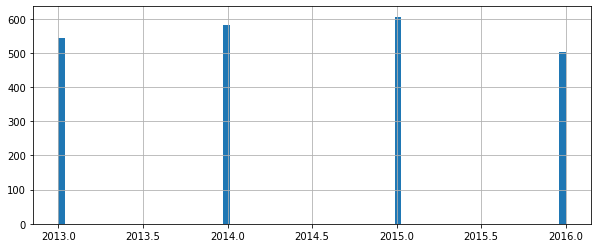

In [23]:
current_period['year_of_release'].hist(bins=80,figsize=(10,4))

### Какие платформы лидируют по продажам, растут или падают? Выберу несколько потенциально прибыльных платформ.

In [24]:
#Определю какие платформы были прибыльны за актуальный период. 
current_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


### Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Глобальные продажи')

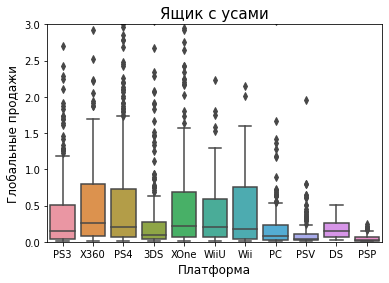

In [25]:
sns.boxplot(data=current_period, x='platform', y='total_sales')
plt.ylim(0, 3)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

- Исходя из графика видно, что медиана у всех по разная.
- Больше всех продаж у WiiU, Wii, X360, XOne, PS4, PS3.
- Успех моделей можно связать как с родным регионом консоли, так и допустим с обновленной версией платформы, которая ранее имела успех.

### Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами.

Посмотрю, как влияют на продажи внутри платформы отзывы критиков и пользователей. Построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами. 

In [26]:
#Корреляция между оценками пользователей и продажами 
wiiu = current_period[current_period['platform']=='WiiU']
wiiu['user_score'].corr(wiiu['total_sales'])

0.4193304819266187

Text(0, 0.5, 'Продажи')

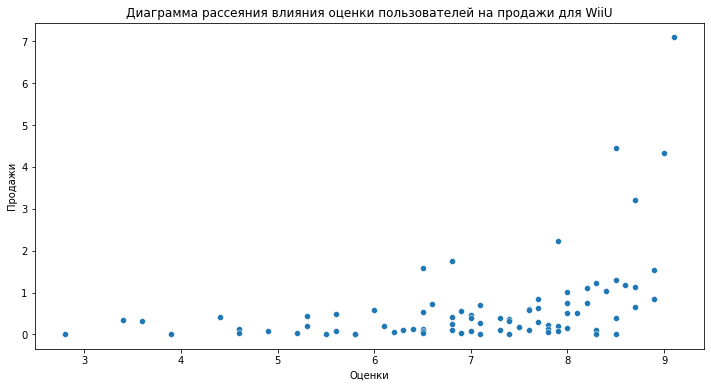

In [27]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=wiiu)
plt.title('Диаграмма рассеяния влияния оценки пользователей на продажи для WiiU')
plt.xlabel('Оценки')
plt.ylabel('Продажи')

In [28]:
#Корреляция между оценками критиков и продажами 
wiiu = current_period[current_period['platform']=='WiiU']
wiiu['critic_score'].corr(wiiu['total_sales'])

0.3764149065423912

Text(0, 0.5, 'Продажи')

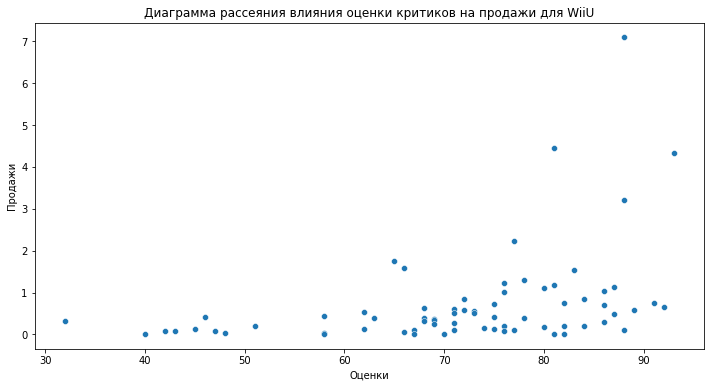

In [29]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=wiiu)
plt.title('Диаграмма рассеяния влияния оценки критиков на продажи для WiiU')
plt.xlabel('Оценки')
plt.ylabel('Продажи')

Диаграмма рассеяния и корреляция отображают прямую связь оценки пользователей и критиков на продажи.

### Соотнесу выводы с продажами игр на других платформах.

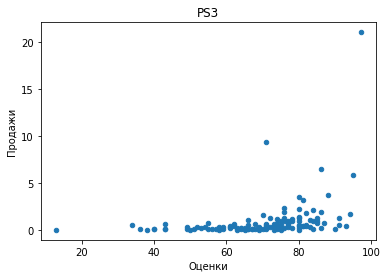

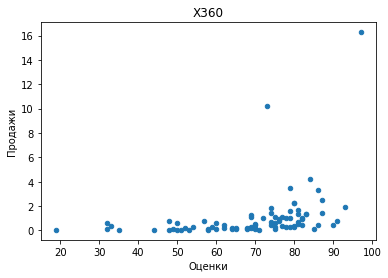

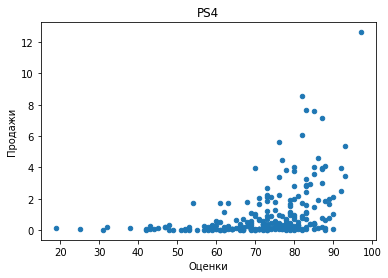

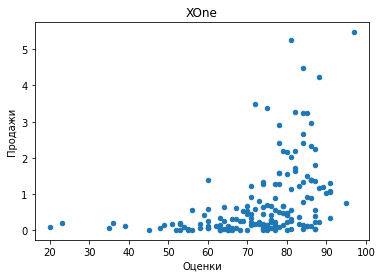

In [30]:
#Напишу функцию, которая будет отрисовывать графики рассеивания:
#по оценкам критиков:
for pl in ['PS3','X360','PS4','XOne']:
    current_period[current_period['platform']== pl].plot.scatter(x = 'critic_score', y = 'total_sales',title=pl)
    plt.xlabel('Оценки')
    plt.ylabel('Продажи')

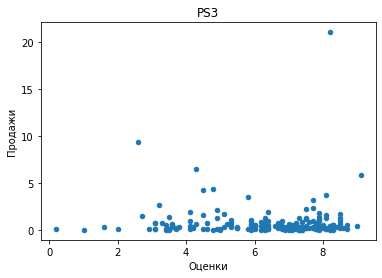

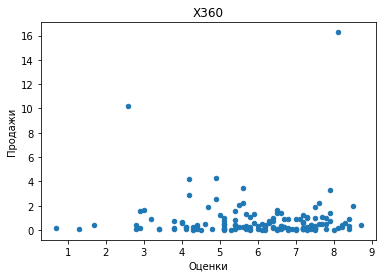

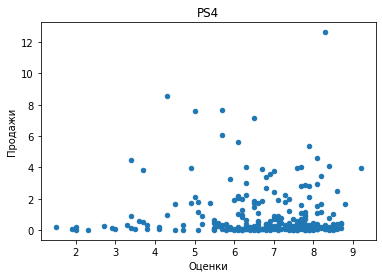

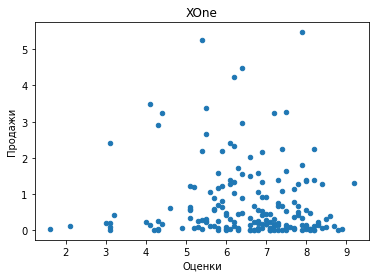

In [31]:
#по оценкам пользователей:
for pl in ['PS3','X360','PS4','XOne']:
    current_period[current_period['platform']== pl].plot.scatter(x = 'user_score', y = 'total_sales',title=pl)
    plt.xlabel('Оценки')
    plt.ylabel('Продажи')

In [32]:
#Напишу функцию, которая будет считать корреляции:
#по оценкам критиков:
for pl in ['PS3','X360','PS4','XOne']:
    print(pl)
    print(current_period[current_period['platform']== pl]['critic_score'].corr(current_period[current_period['platform']== pl]['total_sales']))
    print(' ')

PS3
0.3342853393371919
 
X360
0.3503445460228664
 
PS4
0.40656790206178095
 
XOne
0.4169983280084017
 


In [33]:
#Напишу функцию, которая будет считать корреляции:
#по оценкам пользователей:
for pl in ['PS3','X360','PS4','XOne']:
    print(pl)
    print(current_period[current_period['platform']== pl]['user_score'].corr(current_period[current_period['platform']== pl]['total_sales']))
    print(' ')

PS3
0.0023944027357566925
 
X360
-0.011742185147181342
 
PS4
-0.031957110204556376
 
XOne
-0.06892505328279414
 


Диаграмма рассеяния отображает, что от оценок и отзывов зависят продажи на платформах PS4 и XOne, то есть чем выше оценка, тем больше продаж, о чем также говорит корреляция. Это может быть связано с тем что, у них более интересные игры и удобные платформы для пользователй. 

Для PS3 и X360  на графике ярко выраженной тенденции нет, и значение коэффициента корреляции близко к нулю.

Но стоит заметить оценкам критиков доверяют намного больше.

### Посмотрю на общее распределение игр по жанрам. Проверю, выделяются ли жанры с высокими и низкими продажами?


In [34]:
selection_genre = current_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()
selection_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Также нарисую диаграмму распределения игр


Text(0, 0.5, 'Продажи')

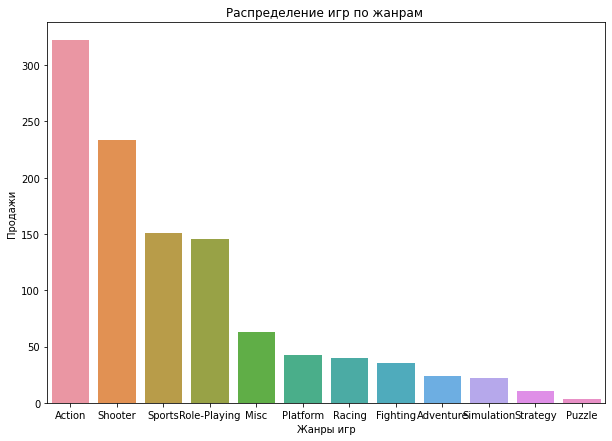

In [35]:
plt.figure(figsize=(10,7))
plt.title('Распределение игр по жанрам ')
sns.barplot(data=selection_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')

Добавлю диаграмму размаха для сравнения медианных продаж.

Text(0, 0.5, 'Глобальные продажи')

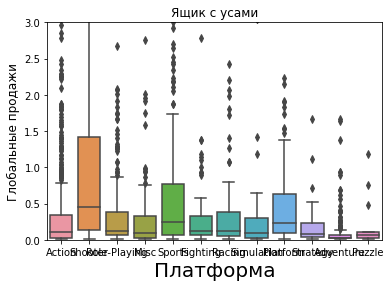

In [36]:
sns.boxplot(data=current_period, x='genre', y='total_sales')
plt.ylim(0, 3)
plt.title('Ящик с усами')
plt.xlabel('Платформа', fontsize=20)
plt.ylabel('Глобальные продажи',fontsize=12)

График нам говорит, что больше всего игр жанра Action, а меньше всего Puzzle. В то время как диаграмма размаха акцентирует наше внимание на игры категории Shooter, значит можем сказать, что именно на нее у клиентов наиболее устойчивый спрос.

## Составление портрета пользователя каждого региона**

### Определите для пользователя каждого региона (NA, EU, JP):

In [37]:
#Самые популярные платформы (топ-5). Опишите различия в долях продаж.
na = current_period.query('na_sales > 0')
na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   float64
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    float64
 9   user_score       974 non-null    float64
 10  rating           1011 non-null   object 
 11  total_sales      1309 non-null   float64
dtypes: float64(8), object(4)
memory usage: 132.9+ KB


In [38]:
eu = current_period.query('eu_sales > 0')
eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   float64
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    float64
 9   user_score       1047 non-null   float64
 10  rating           1086 non-null   object 
 11  total_sales      1422 non-null   float64
dtypes: float64(8), object(4)
memory usage: 144.4+ KB


In [39]:
jp = current_period.query('jp_sales > 0')
jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   float64
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    float64
 9   user_score       462 non-null    float64
 10  rating           475 non-null    object 
 11  total_sales      1187 non-null   float64
dtypes: float64(8), object(4)
memory usage: 120.6+ KB


После подготовки данных, найду популярные платформы для каждого региона

In [40]:
na = pd.pivot_table(na, index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False)
na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [41]:
eu = pd.pivot_table(eu, index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False)
eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [42]:
jp = pd.pivot_table(jp, index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False)
jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


Рейтинг платформ:
- Топ 5 в Северной Америке: PS4, XOne, X360, PS3 и 3DS
- Топ 5 в Европе: PS4, PS3, XOne, X360 и 3DS
- Топ 5 в Японии: 3DS, PS3, PSV, PS4 и WiiU

Различия по популярности платформ скорей всего зависят от влияния фирмы и местоположения компании. Но во всех рейтингах есть продукция компании Sony. Но популярность XOne и X360 в Америке, и 3DS и Wii в Японии обусловлены тем, что их компании производители являются крупными играками рынка в своем регионе. У европейский рынка нет своих крупных играков по разработке игр, поэтому они ориентируются на общую популярность.

Можно сказать, что у компаний хорошие показатели в своем регионе, но значительно отличаются за его пределами.

### Самые популярные жанры (топ-5). Поясните разницу.

Text(0.5, 1.0, 'Распределение количества игр для NA')

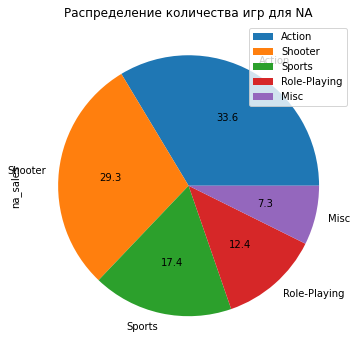

In [43]:
#Построю круговую диаграмму для анализа топовых жанров
na_genre = current_period.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
           .sort_values(by='na_sales', ascending=False)[:5]
na_genre.plot(subplots=True, kind='pie',autopct='%.1f', figsize=(6,6))
plt.title('Распределение количества игр для NA')

Text(0.5, 1.0, 'Распределение количества игр для EU')

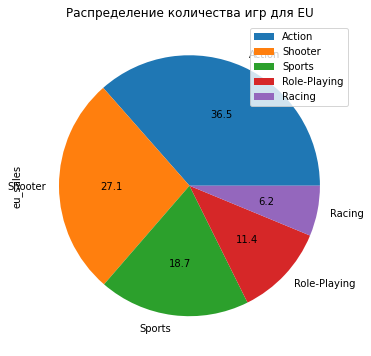

In [44]:
eu_genre = current_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
           .sort_values(by='eu_sales', ascending=False)[:5]
eu_genre.plot(subplots=True, kind='pie',autopct='%.1f', figsize=(6,6))
plt.title('Распределение количества игр для EU')

Text(0.5, 1.0, 'Распределение количества игр для JP')

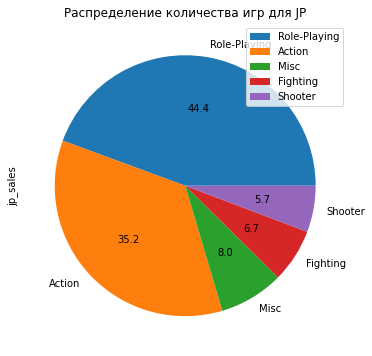

In [45]:
jp_genre = current_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
           .sort_values(by='jp_sales', ascending=False)[:5]
jp_genre.plot(subplots=True, kind='pie',autopct='%.1f', figsize=(6,6))
plt.title('Распределение количества игр для JP')

Рейтинг жанров:

- Топ 5 в Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
- Топ 5 в Европе: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 в Японии: Role-Playing, Action, Misc, Fighting и Shooter

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для анализа построю гарфик

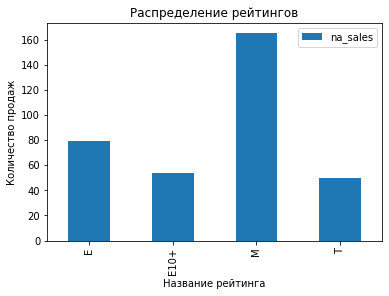

In [46]:
na_rating = current_period.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot.bar()
plt.title("Распределение рейтингов")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")
plt.show()

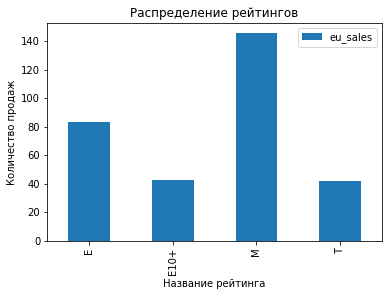

In [47]:
eu_rating = current_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot.bar()
plt.title("Распределение рейтингов")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")
plt.show()

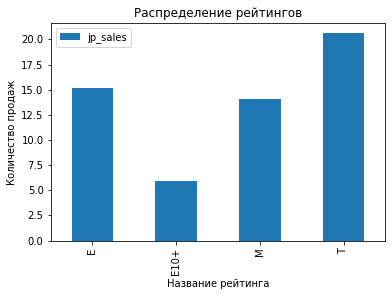

In [48]:
jp_rating = current_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot.bar()
plt.title("Распределение рейтингов")
plt.xlabel("Название рейтинга")
plt.ylabel("Количество продаж")
plt.show()

В NA и EU почти одинаковое распределение. Большая часть выручки получено с игр 18+. В Японии, на первом месте также категория Е, но также близко находится категория Т(то есть игры 13+)

## Проверю гипотезы.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Проверим гипотезу:

- Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [49]:
rating_xone = current_period[(current_period['platform'] == 'XOne') & (current_period['year_of_release'])]['user_score']
rating_pc = current_period[(current_period['platform'] == 'PC') & (current_period['year_of_release'])]['user_score']
rating_xone = rating_xone.dropna()
rating_pc = rating_pc.dropna()

alpha = .05

results = st.ttest_ind(rating_xone, rating_pc, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Средний пользовательский рейтинг платформы Xbox One =", rating_xone.mean())
print("Средний пользовательский рейтинг платформы PC =", rating_pc.mean())

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг платформы Xbox One = 6.521428571428572
Средний пользовательский рейтинг платформы PC = 6.2696774193548395


Не получилось отвергнуть нулевую гипотезу - это значит, что Н1 отвергнута, а средние пользовательские рейтинги платформ Xbox One и PC схожи.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим следующую гипотезу:

- Н0: средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Н1: средние пользовательские рейтинги жанров Action и Sports разные.   

In [50]:
rating_action = current_period[(current_period['genre'] == 'Action') & (current_period['year_of_release'])]['user_score']
rating_sports = current_period[(current_period['genre'] == 'Sports') & (current_period['year_of_release'])]['user_score']
rating_action = rating_action.dropna()
rating_sports = rating_sports.dropna()
alpha = .05

results = st.ttest_ind(rating_action, rating_sports, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Средний пользовательский рейтинг жанра Action =", rating_action.mean())
print("Средний пользовательский рейтинг жанров Sports  =", rating_sports.mean())

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action = 6.837532133676092
Средний пользовательский рейтинг жанров Sports  = 5.238124999999999


Н0 отвергнута, а это означает, что средние пользовательские рейтинги жанров Action и Sports разные. 

Когда нулевая гипотеза отвергается, мы отвергаем ее в пользу альтернативой гипотезы, а значит, это говорит о том, что интересующий нас параметр или больше какого-то значения или меньше него (alpha = .05).

Данная гипотеза будет о равенстве будет HO, соответственно не отвержение данной гипотезы будет означать равенство есть, а в случае отвержения, мы автоматически принимаем альтернативную о неравенстве.

## Вывод.

- Перед тем как сделать анализ данных, я подготовила данные, привели к правильным данным столбцы, привели к нижнему регистру столбцы и привели к правильным типам данных необходимые столбцы.
- Заменили tbd на nan для проведения дальнейшего анализа.
- Проведя анализ, выявила, что спрос на игры и игровые приставки начал расти с 1994 года. А с 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, пошел спад.
- За весь период самые популярные оказались следующие приставки: PS2, X360, PS3, WII, DS, PS.
- Также мной было выявлено, что средняя продолжительность жизни игровой приставки составляет 10 лет. Пик продаж наступает примерно через 5 лет после выпуска консоли
- Проведя анализ оценок пользователей и критиков выявила, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. Получается, чем больше оценка критиков или пользователей, тем лучше продажа игры.
- А ещё, определила, что самый популярный жанр за все время это Action, а на последнем месте Strategy,

После мной был составлен портрет пользователей каждого региона.
- В Северной Америки:
   - Популярными жанры: Аction, Sports, Shooter. 
   - Игровые приставки: PS2, X360, Wii, PS3, PS. 
   - По рейтингу игр: E, M, T.
- В Европе:
   - Популярными жанры: Аction, Sports, Shooter.
   - Игровые приставки: PS2, PS3, X360, Wii, PS. 
   - По рейтингу: E, M, T. Но игр с рейтингом М покупают чаще, чем в Северной Америке.
- В Японии:
   - Популярными жанры: Role-Playing, Action и Sports.
   - Игровые приставки: DS, PS, PS2, SNES, 3DS 
   - По рейтингу: E, M, T. Но игры категории Т достаточно популярны.
   
Для прогноза продаж лучше брать данные за последний год, тк технологии развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Action, Sports, для платформ PS2-PS4, DS и Х360, с рейтингом от 17 и выше.

Также, по проведенному анализу можно сказать, что влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей таким "влиянием" на выручку похвастаться не могут.